# Ad Classifier Training using Decision Tree and Random Forest

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline')

from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('/Users/SeoyeonHong/Desktop/annoying_ad_classifier/ad_vectors.csv')
df = df.drop('Unnamed: 0', 1)

In [5]:
df

,TYPE,00,000,000000,000000e,0000043px,000004px,00001px,001em,0023,...,zlotych,zonedmodule,zoom,zopim,zrmzoje,zte,zu4egz,zuqda9b,zvlbjap,zxx8xmr
0,popup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,popup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,popup,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,popup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,popup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,better,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,better,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,better,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450,better,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Retrieving list of independent variable names
features = list(df.columns)
features.remove('TYPE')

In [7]:
len(features)

7814

In [8]:
# Dividing the independent variables(x) and dependent variable(y)
x = df[features]
y = df['TYPE']

In [9]:
#Change all input types to string
for index in range(len(y)):
  if type(y[index]) == int:
    y[index] = str(y[index])

In [10]:
#Split train, test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# (1) ID3 Decision Tree

Using 10-fold cross validation and 1000 random model trainings to evaluate model performance

In [11]:
# 10-fold cross validation
id3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 7)
id3 = id3.fit(x_train,y_train)
scores = cross_val_score(id3, x, y, cv = 10)

In [12]:
#Cross validation scores
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.785 (std: 0.080)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


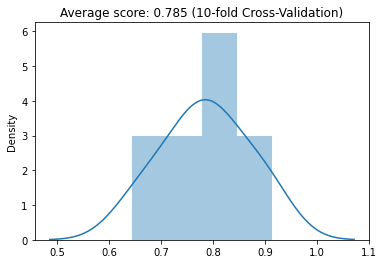

In [13]:
sns.distplot(scores).set_title('Average score: {} (10-fold Cross-Validation)'.format(round(np.mean(scores), 3)))
#plt.savefig("id3_cv10.png")
plt.show()

In [14]:
# testing out model scores on 1000 random datasets to see performace distribution

model_accuracies = []

for i in range(1000):
    (x_train,
     x_test,
     y_train,
     y_test) = train_test_split(x, y, test_size = 0.2)
    
    decision_tree_classifier = DecisionTreeClassifier(criterion = "entropy")
    decision_tree_classifier.fit(x_train, y_train)
    y_pred = decision_tree_classifier.predict(x_test)
    classifier_accuracy = metrics.accuracy_score(y_test, y_pred)
    model_accuracies.append(classifier_accuracy)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


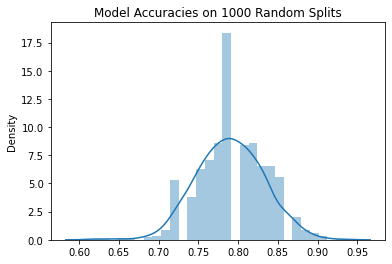

In [15]:
sns.distplot(model_accuracies).set_title('Model Accuracies on 1000 Random Splits')
plt.show()

Training & Evaluating ID3

In [22]:
# Calculating model accuracy and drawing confusion matrix

predictions = id3.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9340659340659341
[[26  1  0]
 [ 3 24  0]
 [ 0  2 35]]
              precision    recall  f1-score   support

      better       0.90      0.96      0.93        27
       popup       0.89      0.89      0.89        27
      sticky       1.00      0.95      0.97        37

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91



In [23]:
# Extracting feature importances

feature_importance = pd.DataFrame({'feature': list(x_train.columns),'importance': id3.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Displaying 15 top important features

feature_importance.head(15)

,feature,importance
61,0pt,0.229799
2621,cookies,0.153637
2400,close,0.139157
6982,tb,0.052884
5088,modal,0.039818
4281,index,0.034686
471,2147483647,0.029952
7249,try,0.023866
2087,brand,0.023063
4733,like,0.022400


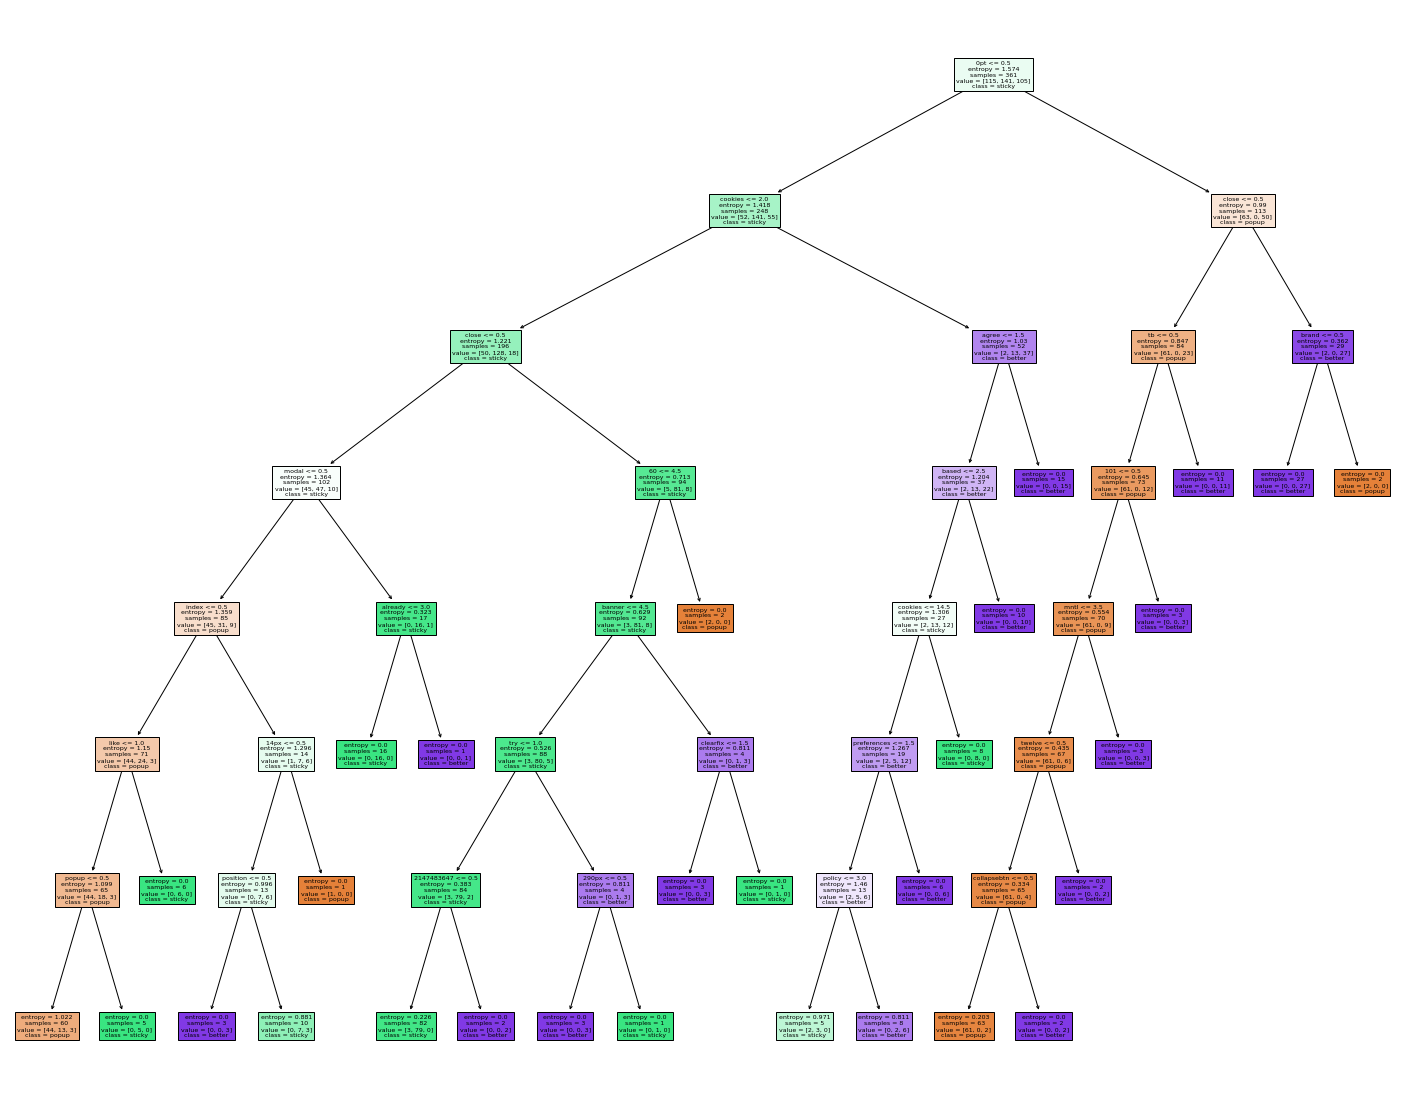

In [24]:
# Visualizing tree

fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(id3, 
                   feature_names = features,  
                   class_names= ['popup', 'sticky', 'better'],
                   filled=True)

# Random Forest

In [30]:
array = df.values

# Defining dependent & independent variables

x = df[feature_cols]
y = df['type_']

validation_size = 0.20 # 80% for training models

# Splitting training & testing data

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = validation_size)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt', criterion = "entropy")

rf.fit(x_train, y_train) # model training

y_pred = rf.predict(x_test) # model testing

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # RF classifier accuracy

Accuracy: 0.8131868131868132


In [44]:
# Printing accuracy and confusion matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8131868131868132
[[19  9  0]
 [ 2 35  3]
 [ 1  2 20]]
              precision    recall  f1-score   support

      better       0.86      0.68      0.76        28
       popup       0.76      0.88      0.81        40
      sticky       0.87      0.87      0.87        23

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [78]:
# Finding the average number of nodes and average maximum depth of model

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 248
Average maximum depth 51


In [45]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(x_train.columns),'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display top 15 important features
fi.head(15)

,feature,importance
2400,close,0.027301
1437,ad,0.024246
61,0pt,0.020594
5088,modal,0.018605
2060,border,0.017380
2991,display,0.015376
5334,none,0.011334
2601,cookie,0.010414
4281,index,0.010359
2017,block,0.009323


# Optimized RF

In [107]:
# Using RandomizedSearchCV finding the best performing model over a set of hyperparameter grid

from sklearn.model_selection import RandomizedSearchCV

RSEED = 50

# Hyperparameter grid
param_grid = {'criterion': 'entropy',
    'n_estimators': np.linspace(10, 100).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 4, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'accuracy', cv = 3, 
                        n_iter = 5, verbose = 1, random_state=RSEED, return_train_score = True)

# Fit 
rs.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyError: 'e'

In [65]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [103]:
# finding the parameters of the best performing model

rs.best_params_

{'n_estimators': 94,
 'min_samples_split': 2,
 'max_leaf_nodes': 33,
 'max_features': 0.7999999999999999,
 'max_depth': 12,
 'criterion': 'entropy',
 'bootstrap': True}

In [104]:
# Selecting the best performing model

best_model = rs.best_estimator_

In [105]:
train_rf_predictions = best_model.predict(x_train)
train_rf_probs = best_model.predict_proba(x_train)[:, 1]

rf_predictions = best_model.predict(x_test)
rf_probs = best_model.predict_proba(x_test)[:, 1]

In [106]:
# Print model performance and confusion matrix

predictions = best_model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8571428571428571
[[25  2  1]
 [ 3 33  4]
 [ 3  0 20]]
              precision    recall  f1-score   support

      better       0.81      0.89      0.85        28
       popup       0.94      0.82      0.88        40
      sticky       0.80      0.87      0.83        23

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.85        91
weighted avg       0.86      0.86      0.86        91



In [85]:
# Extract feature importance
fi = pd.DataFrame({'feature': list(x_train.columns),'importance': best_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display top 15 significant features
fi.head(15)

,feature,importance
61,0pt,0.177342
2400,close,0.154546
2621,cookies,0.082085
1437,ad,0.047315
2601,cookie,0.040403
84,101,0.020622
5088,modal,0.014377
4281,index,0.013839
7399,use,0.012910
1861,banner,0.012449


In [88]:
# Exporting final classifier

from sklearn.externals import joblib
joblib.dump(best_model, '/Users/SeoyeonHong/Desktop/oda_format/ad_classifier_rf.pkl') 

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/Users/SeoyeonHong/Desktop/oda_format/ad_classifier_rf.pkl']

In [86]:
# Visualizing one of the trees from final RF model

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=x_train.columns, max_depth = 10, 
                class_names = ['popup', 'sticky','better'], filled = True)

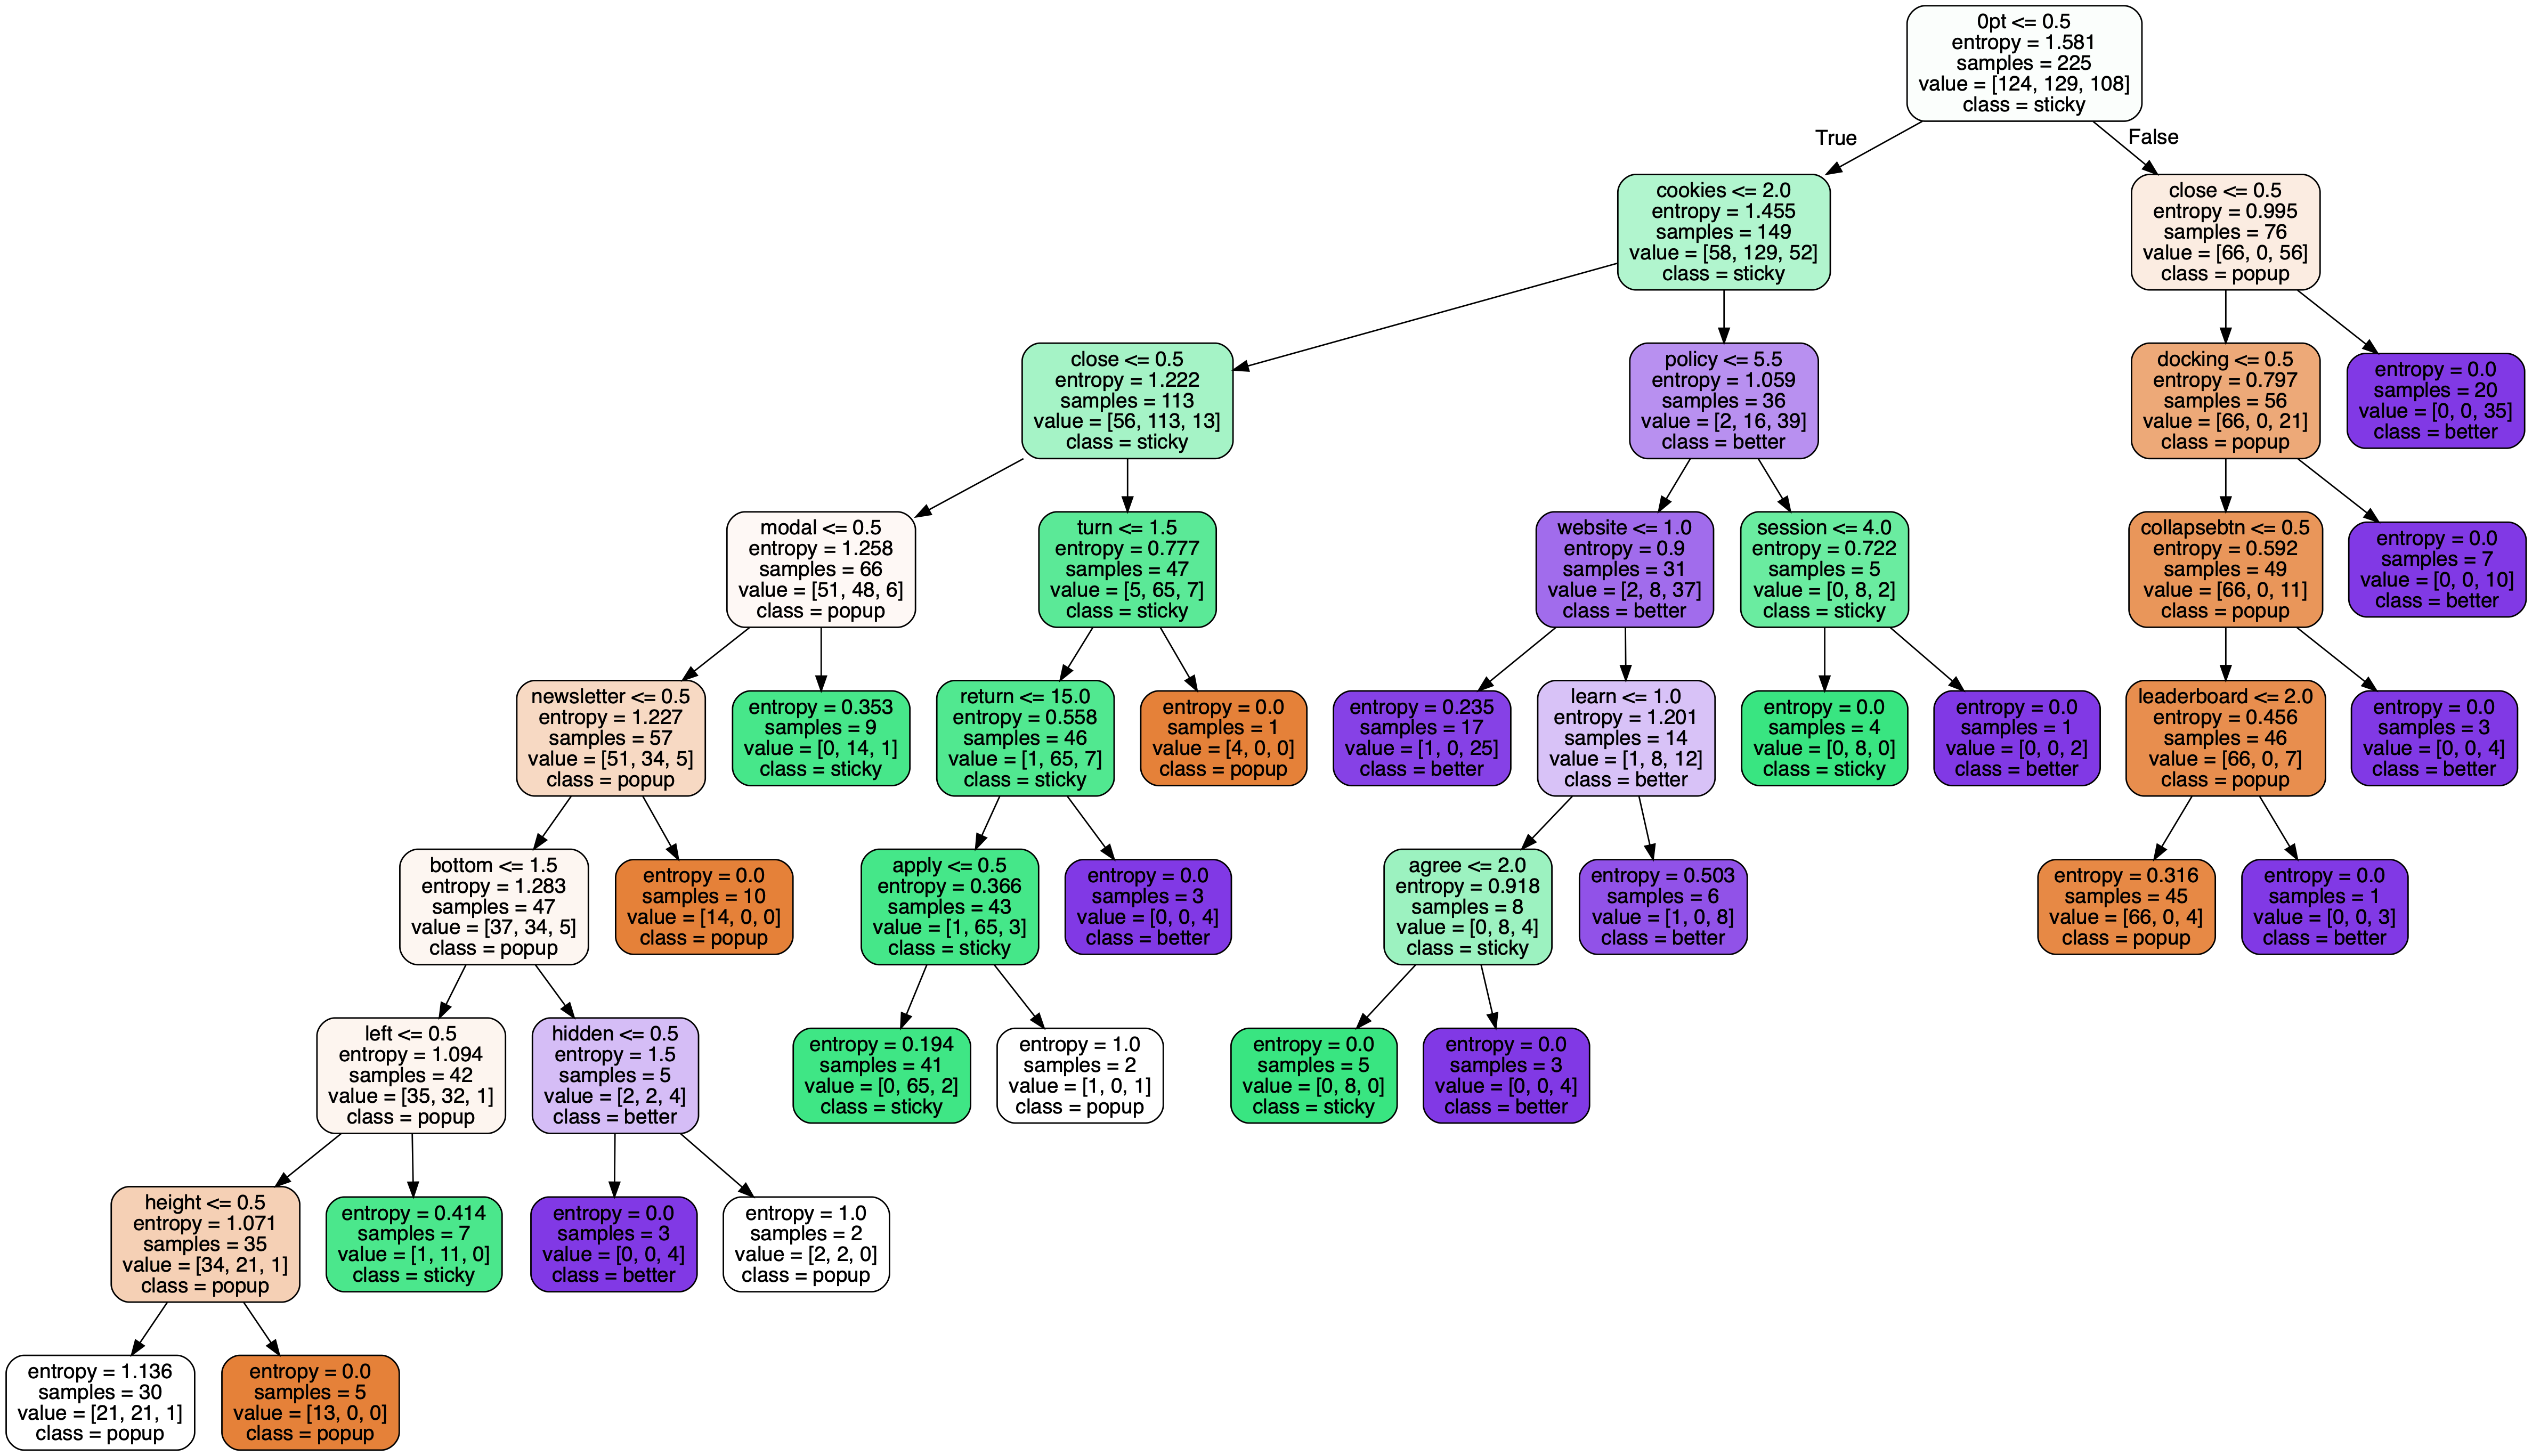

In [87]:
from subprocess import call
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest_wo.png', '-Gdpi=200'])
Image('tree_from_optimized_forest_wo.png')